# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning) 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

%pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn import cluster, datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

     -------------------------------------- 282.6/282.6 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
kmeans = KMeans()

clusters = kmeans.fit(X)

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
print('Modelo - KMeans: Silhouette Score: {}'.format(silhouette_score(X, clusters.labels_)))

Modelo - KMeans: Silhouette Score: 0.5489993239795675


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
kmeans = KMeans(n_clusters = 5)

clusters = kmeans.fit(X)

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
print('Modelo - KMeans: Silhouette Score: {}'.format(silhouette_score(X, clusters.labels_)))

Modelo - KMeans: Silhouette Score: 0.5489993239795675


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [10]:
kmeans = KMeans(n_clusters = 3)

clusters = kmeans.fit(X)

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
print('Modelo - KMeans: Silhouette Score: {}'.format(silhouette_score(X, clusters.labels_)))

Modelo - KMeans: Silhouette Score: 0.5711381937868838


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

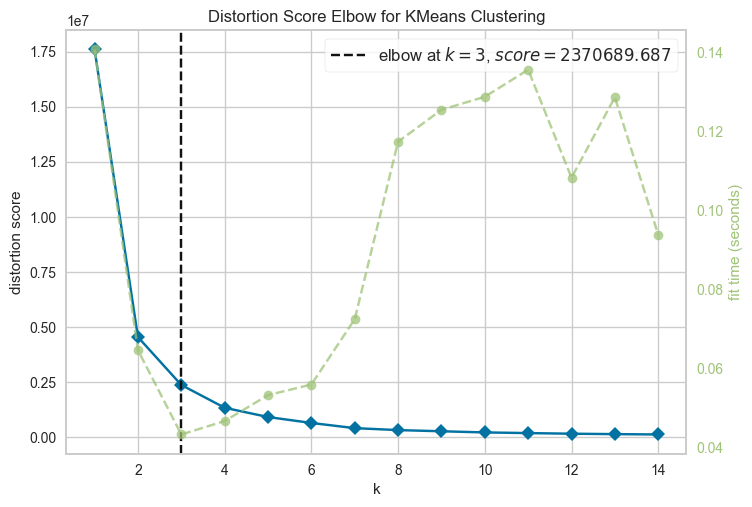

In [17]:
modelo = KMeans()

visual = KElbowVisualizer(modelo, k = (1, 15))

visual.fit(X)

visual.poof(); 

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

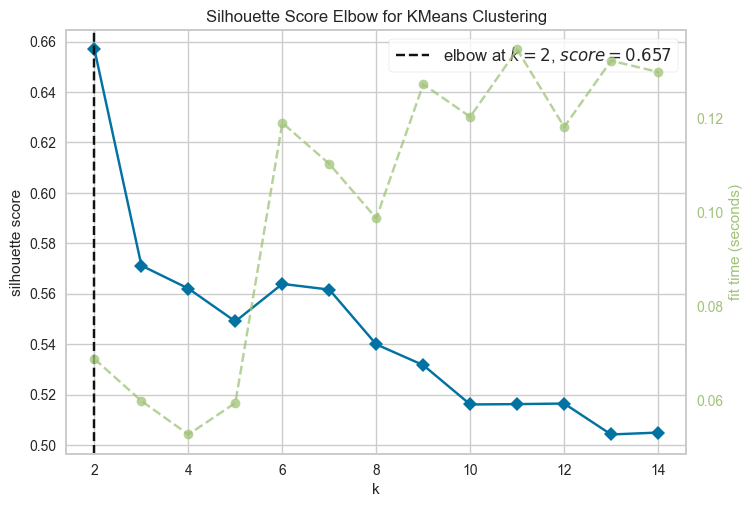

In [18]:
modelo = KMeans()

visual = KElbowVisualizer(modelo, k = (2, 15), metric = 'silhouette')

visual.fit(X)

visual.poof(); 

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

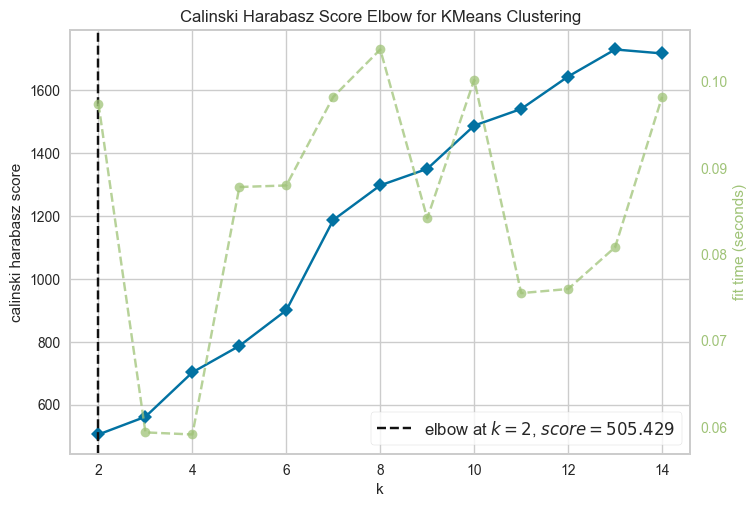

In [14]:
modelo = KMeans()

visual = KElbowVisualizer(modelo, k = (2, 15), metric = 'calinski_harabasz')

visual.fit(X)

visual.poof(); 

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

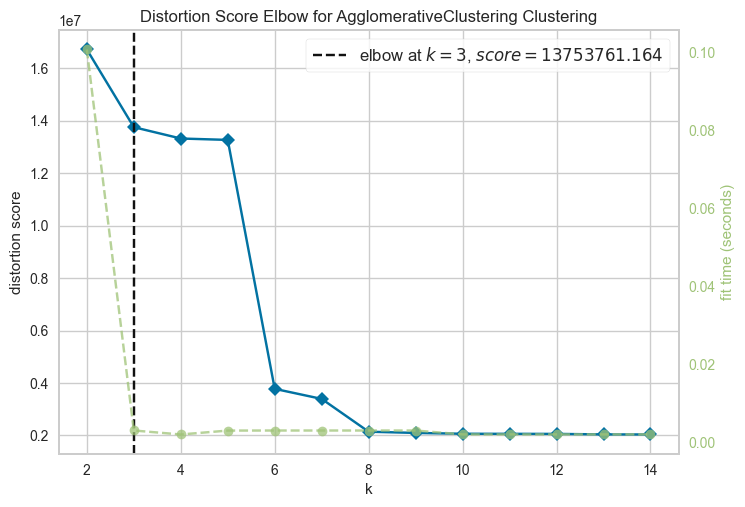

In [15]:
modelo = cluster.AgglomerativeClustering(n_clusters = 2, linkage = 'single')

visual = KElbowVisualizer(modelo, k = (2, 15))

visual.fit(X)

visual.poof(); 

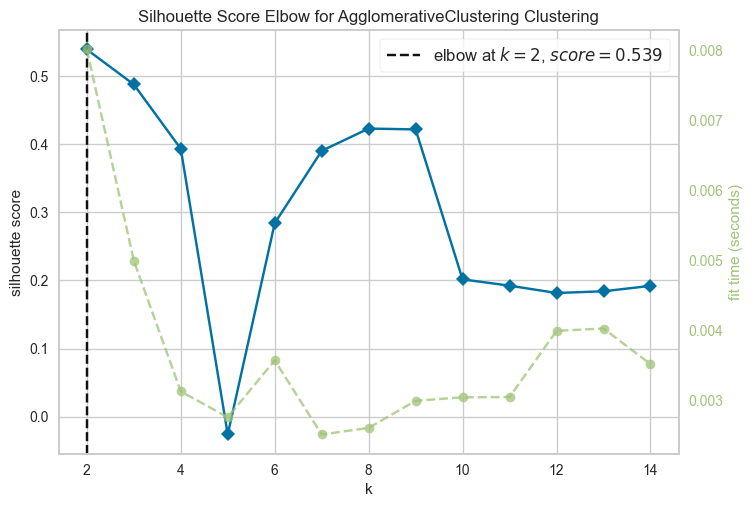

In [19]:
modelo = cluster.AgglomerativeClustering(n_clusters = 2, linkage = 'single')

visual = KElbowVisualizer(modelo, k = (2, 15), metric = 'silhouette')

visual.fit(X)

visual.poof(); 

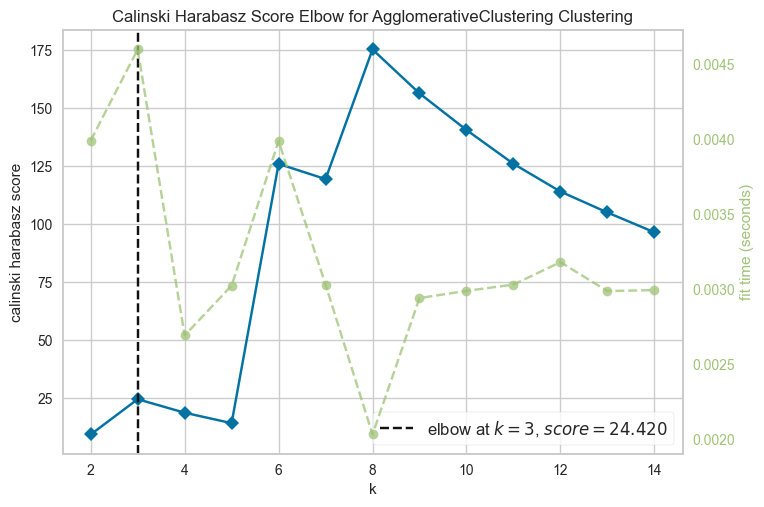

In [20]:
modelo = cluster.AgglomerativeClustering(n_clusters = 2, linkage = 'single')

visual = KElbowVisualizer(modelo, k = (2, 15), metric = 'calinski_harabasz')

visual.fit(X)

visual.poof(); 

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\usuario\AppData\Local\Temp\ipykernel_10708\708192682.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(X, c = pred, cmap = 'cool', ax = axes)


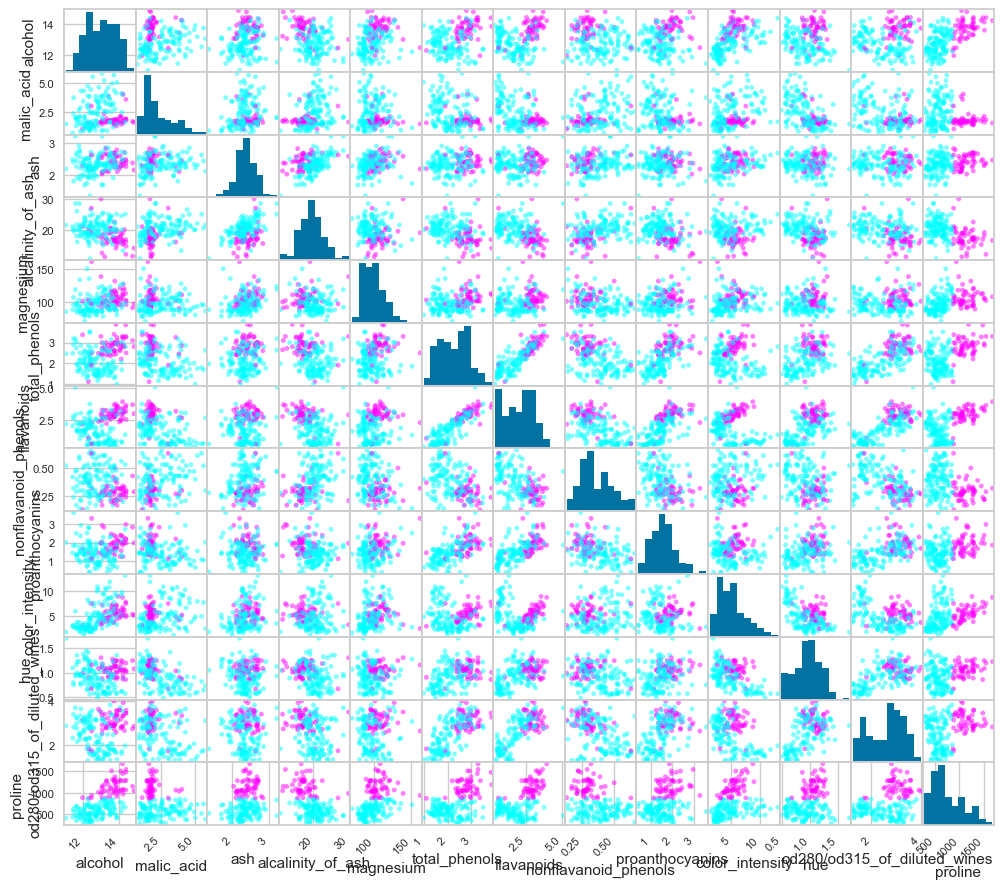

In [27]:
kmeans = KMeans(n_clusters = 2)
pred = kmeans.fit(X).labels_

fig, axes = plt.subplots(figsize = (12, 12))

pd.plotting.scatter_matrix(X, c = pred, cmap = 'cool', ax = axes)

fig.autofmt_xdate(rotation = 45, ha = 'right')

plt.show(); 

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [28]:
pca = PCA(n_components = 2).fit(X)

pca_x = pca.fit_transform(X)

pca_x.shape

(178, 2)

In [29]:
df = pd.DataFrame(pca_x)

In [30]:
df.columns = ['col1','col2']

df.head()

,col1,col2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [31]:
kmeans = KMeans(n_clusters = 2)

clusters = kmeans.fit(df)

clusters

c:\Users\usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

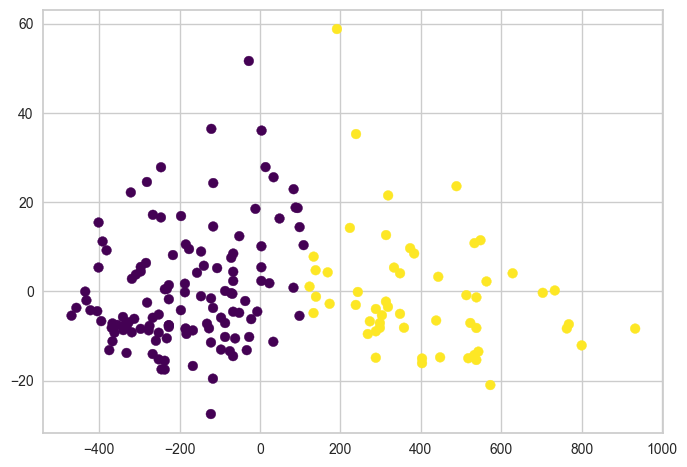

In [32]:
plt.scatter(df.col1,   # x
            df.col2,   # y
            c = clusters.labels_,cmap = 'viridis'); 

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

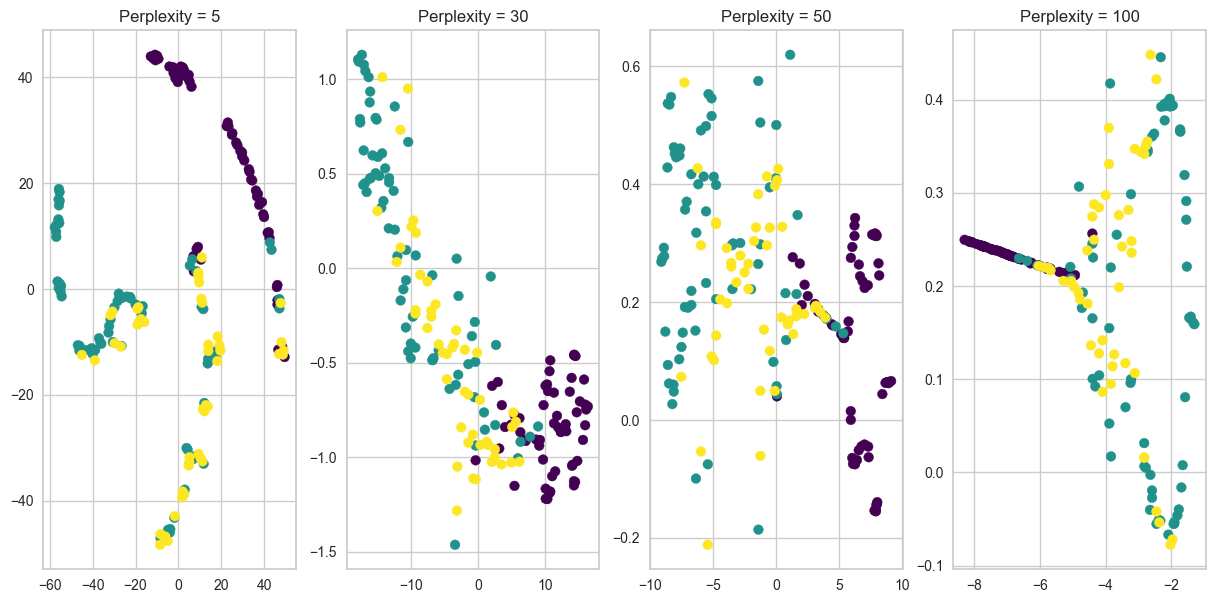

In [33]:
fig, ax = plt.subplots(1, 4, figsize = (15, 7))

for i, p in enumerate([5, 30, 50, 100]):
    
    tsne = TSNE(perplexity = p)
    
    x_emb = tsne.fit_transform(X)
    
    ax[i].scatter(x_emb[:, 0], x_emb[:, 1], c = y, cmap = 'viridis')
    ax[i].set_title('Perplexity = {}'.format(p))
    
plt.show(); 